# Análisis predictivo de series temporales

## Modelos estadísticos básicos de series temporales

### Definición:

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$).

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

* Normalmente __graficar__ la evolución de una realización nos da pistas de cómo analizarla.

* A veces las graficaremos como puntos, otras veces como líneas continuas, sobre todo cuando sean la realización de algún proceso continuo subyacente. (por ejemplo, sismógrafo, sonido en la sección anterior). 

* En general series continuas de todos modos se *muestrean* a intervalos discretos, y al analizarlas en un computadora esto es forzosamente así.

* __Observación:__ Elegir el intervalo de muestreo es un arte en sí mismo para capturar la dinámica de la serie.

### Instalación de bibliotecas:

In [2]:
#install.packages("devtools") 
#devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)

##Ajusto tamaño de figuras
options(repr.plot.width=14, repr.plot.height=6)

### Ejemplo: Ruido blanco

__Definición:__ El caso más sencillo de serie temporal es un conjunto de variables aleatorias con la misma distribución y no correlacionadas. Si ${w_t}$ es una serie temporal en la cual las variables tienen media $E[w_t]=0$, varianza $Var(w_t) = \sigma_w^2 >0$ y la covarianza de $w_t$ y $w_s$ es $0$ se le denomina *ruido blanco*.  

__Definición:__ Si además las variables son independientes y con la misma distribución (iid), se le denomina ruido blanco independiente.

__Definición:__ En el caso que además la distribución de $w_t$ para cada $t$ sea Normal $N(0,\sigma_w^2)$ le llamamos *ruido blanco gaussiano*

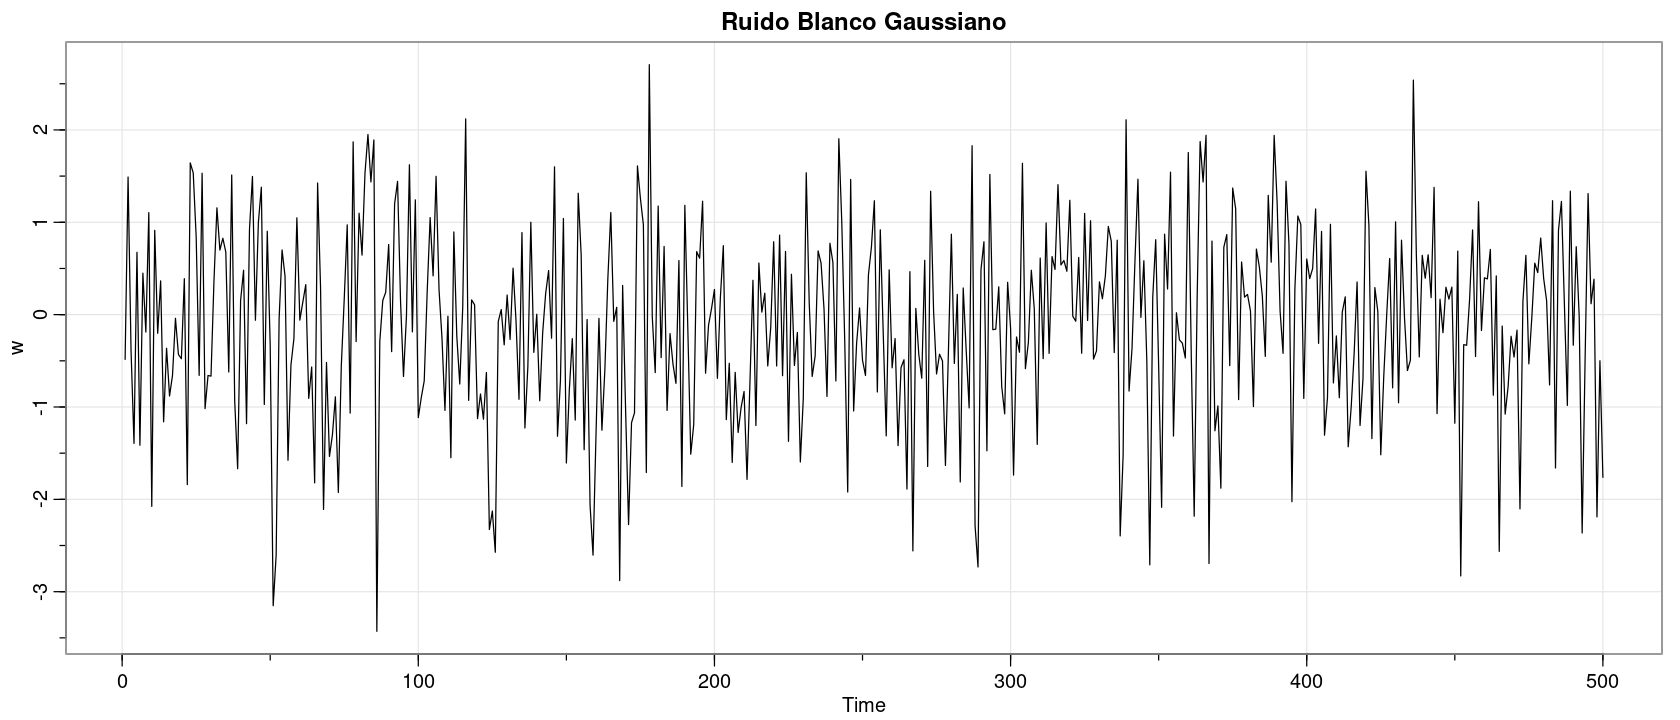

In [3]:
w = rnorm(500,0,1)  # 500 N(0,1) variates
tsplot(w, main="Ruido Blanco Gaussiano")

### Ejemplo 2: Media móvil


Considere un proceso de ruido blanco (gaussiano) $w_t$ al que se le aplica el siguiente proceso:

$$ x_t = \frac{1}{3}(w_{t-1} + w_t + w_{t+1})$$

Es decir, el valor de $v_t$ es un promedio de los 3 valores "cercanos" del proceso anterior. ¿Qué ocurre?

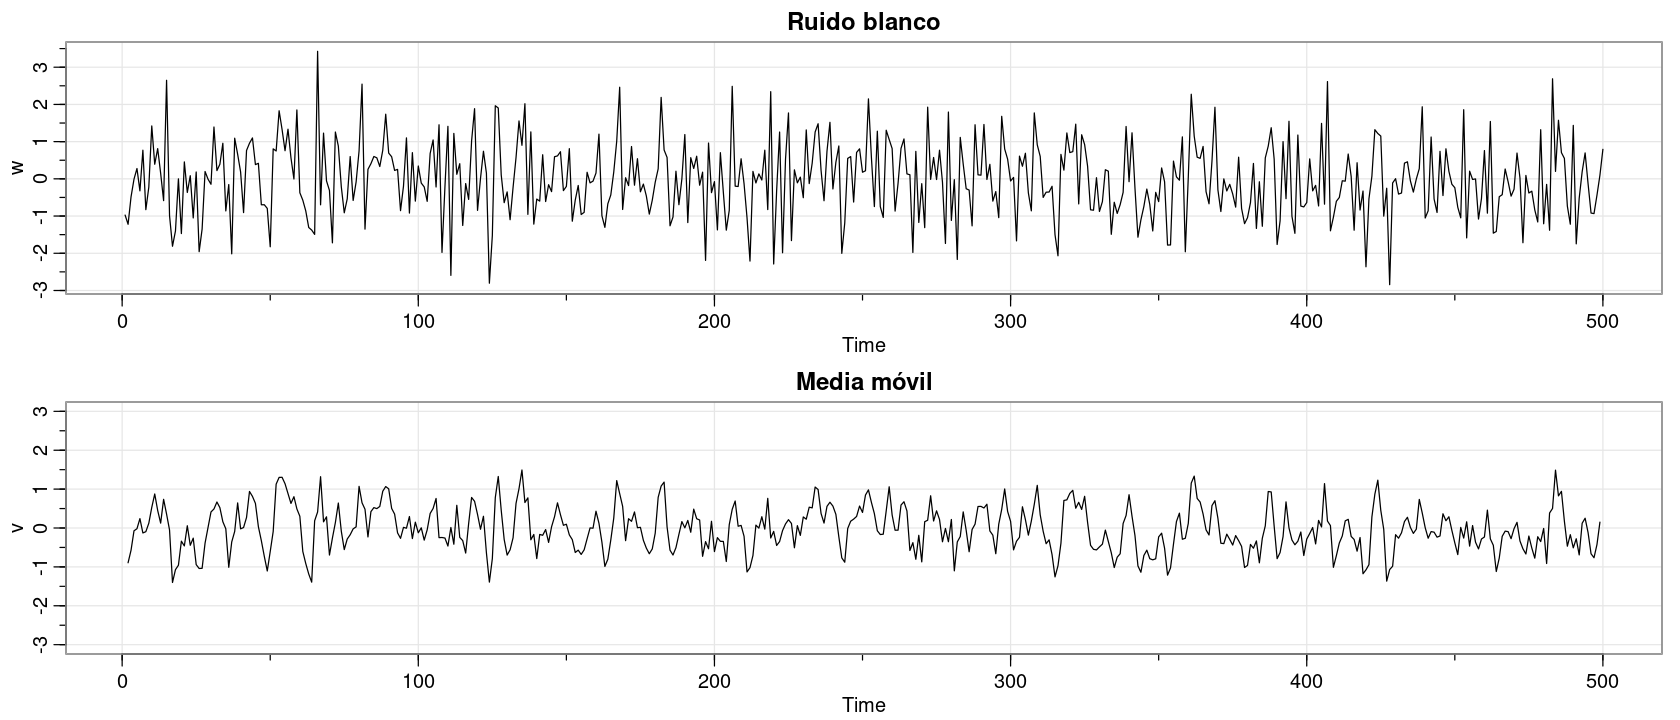

In [4]:
w = rnorm(500,0,1)  # 500 N(0,1) variates
v = filter(w, sides=2, rep(1/3,3))  # moving average
par(mfrow=c(2,1))
tsplot(w, main="Ruido blanco")
tsplot(v, ylim=c(-3,3), main="Media móvil")

### Observaciones:

* El proceso $x_t$ es más *suave* que el ruido blanco.

* El promediado elimina las oscilaciones más rápidas, y comienzan a realzarse las lentas.

* Al proceso de tomar ruido blanco (o cualquier señal) y aplicarle una transformación como la anterior se le llama *media móvil* o *filtrado*. De ahí el comando `filter` que se utiliza.

## Ejemplo 3: Autoregresiones

Consideremos una señal $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = x_{t-1} - 0.9 x_{t-2} + w_t.$$

A este proceso se le denomina *autorregresivo* de orden $2$.

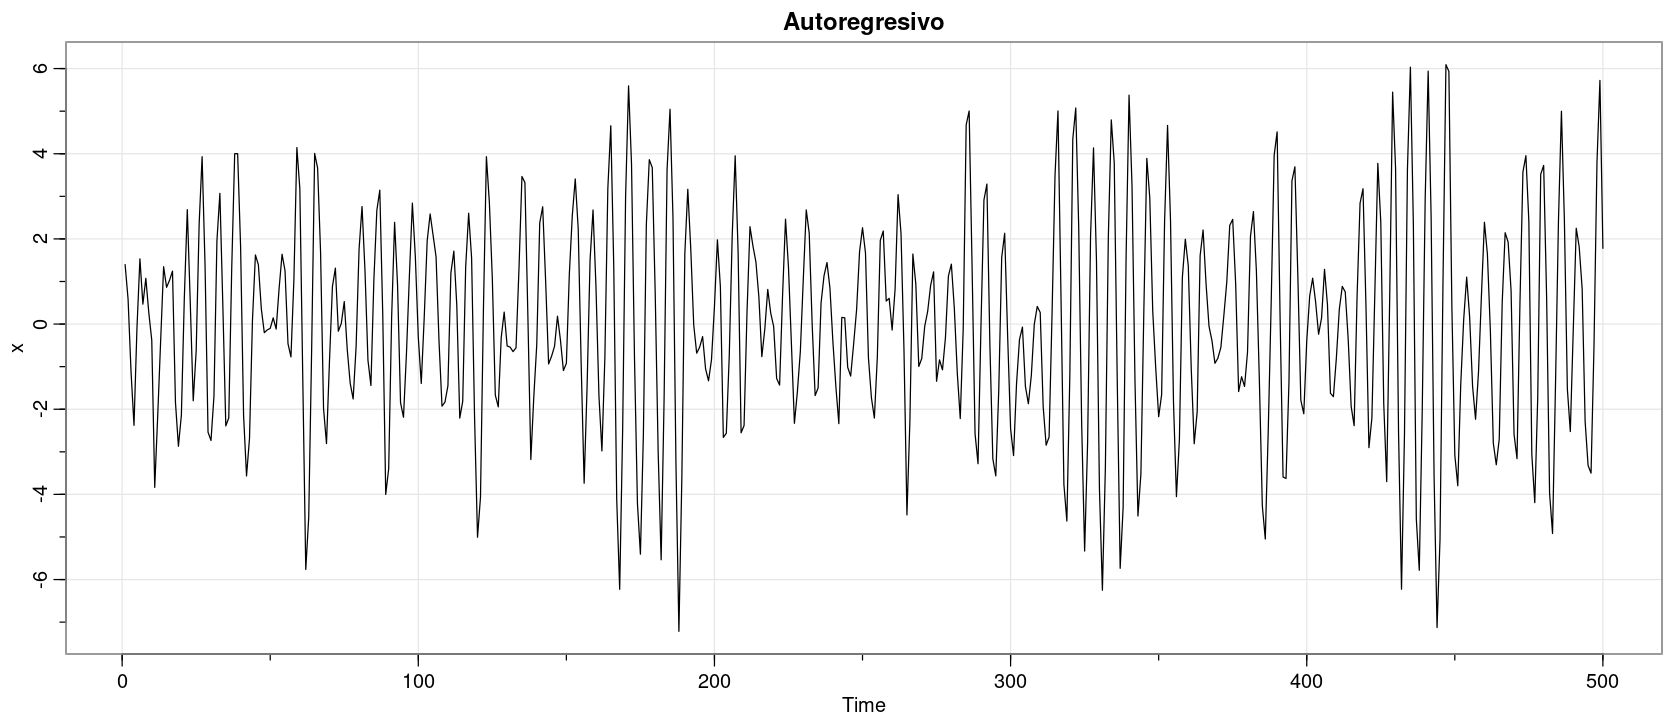

In [5]:
w = rnorm(500,0,1)
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="Autoregresivo")

### Observaciones:

* El proceso $x_t$ presenta oscilaciones, producto de la dependencia con los anteriores.

* Observemos que tenemos que definir las condiciones iniciales para la serie ($x_0$ y $x_{-1}$).

* También puede generarse usando el comando `filter`

## Ejemplo 4: Paseo al azar con deriva.

Consideremos una señal $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = \delta + x_{t-1} + w_t.$$

Es un paseo al azar con deriva: $\delta$ es la magnitud de la deriva. Observemos que el proceso va acumulando los ruidos anteriores. 

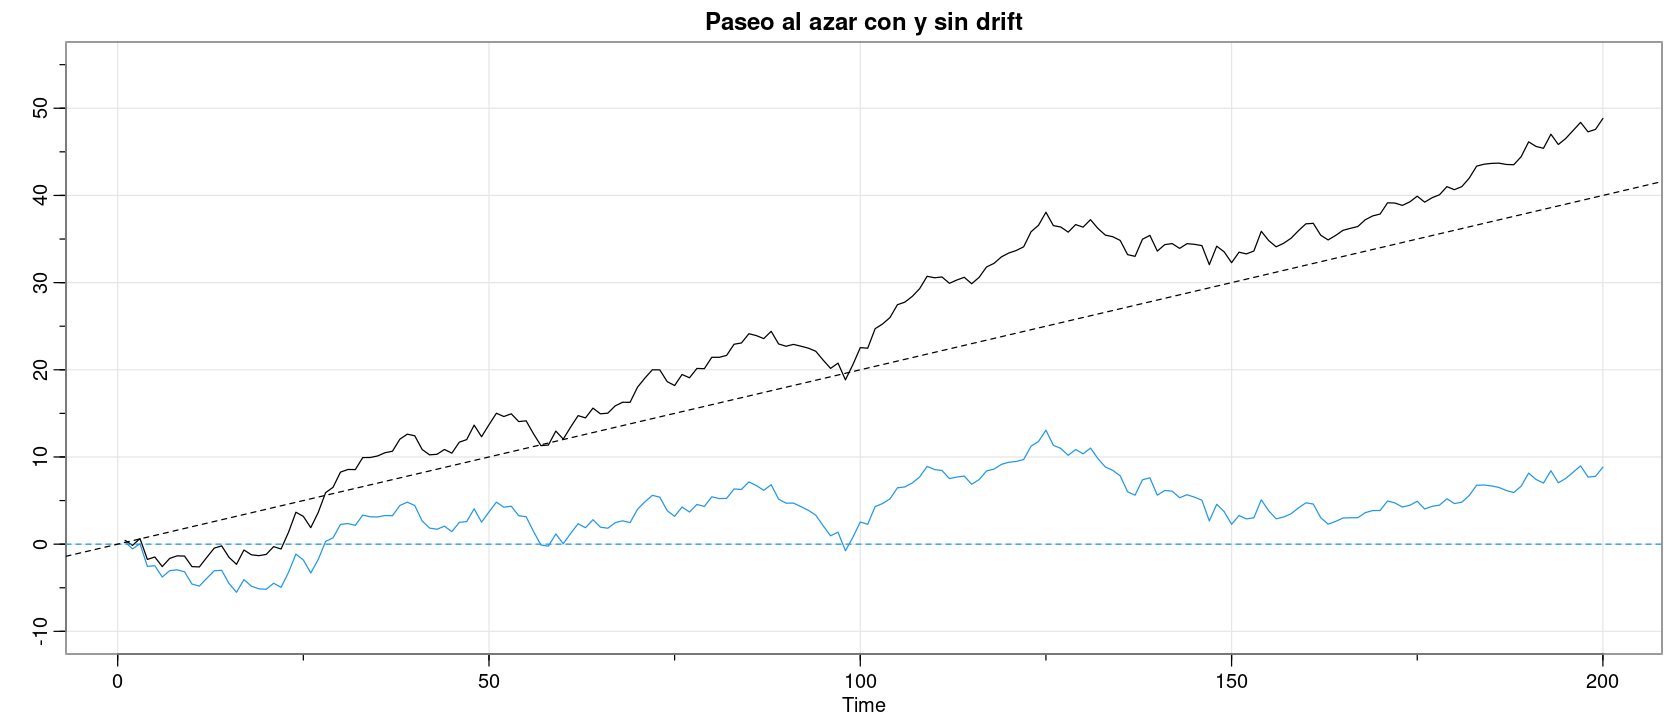

In [17]:
w = rnorm(200)  #Genero la serie w
x = cumsum(w)   #Al acumular w obtengo x para delta=0

delta = .2
wd = w + delta  #Ahora sumo delta en cada paso
xd = cumsum(wd) #y acumulo

tsplot(xd, ylim=c(-10,55), main="Paseo al azar con y sin drift", ylab='')
lines(x, col=4) 
abline(h=0, col=4, lty=2)
abline(a=0, b=delta, lty=2)

### Observaciones:

El proceso no es estacionario!

 * Si la deriva es distinta de 0, esto es obvio. El valor medio de la señak va creciendo (o decreciendo) indefinidamente).
 
 * Si la deriva es 0, de todos modos la varianza va aumentando a medida que acumulamos más y más instancias del ruido.
 
Si consideramos los __incrementos__ del proceso, estos sí son estacionarios.

### Ejemplo 5: Señal y ruido

Se tiene la señal:

$$ x_t = s_t + w_t$$

Siendo $s_t$ la siguiente:

$$s_t = 2*\cos\left(2\pi\frac{t+15}{50}\right).$$

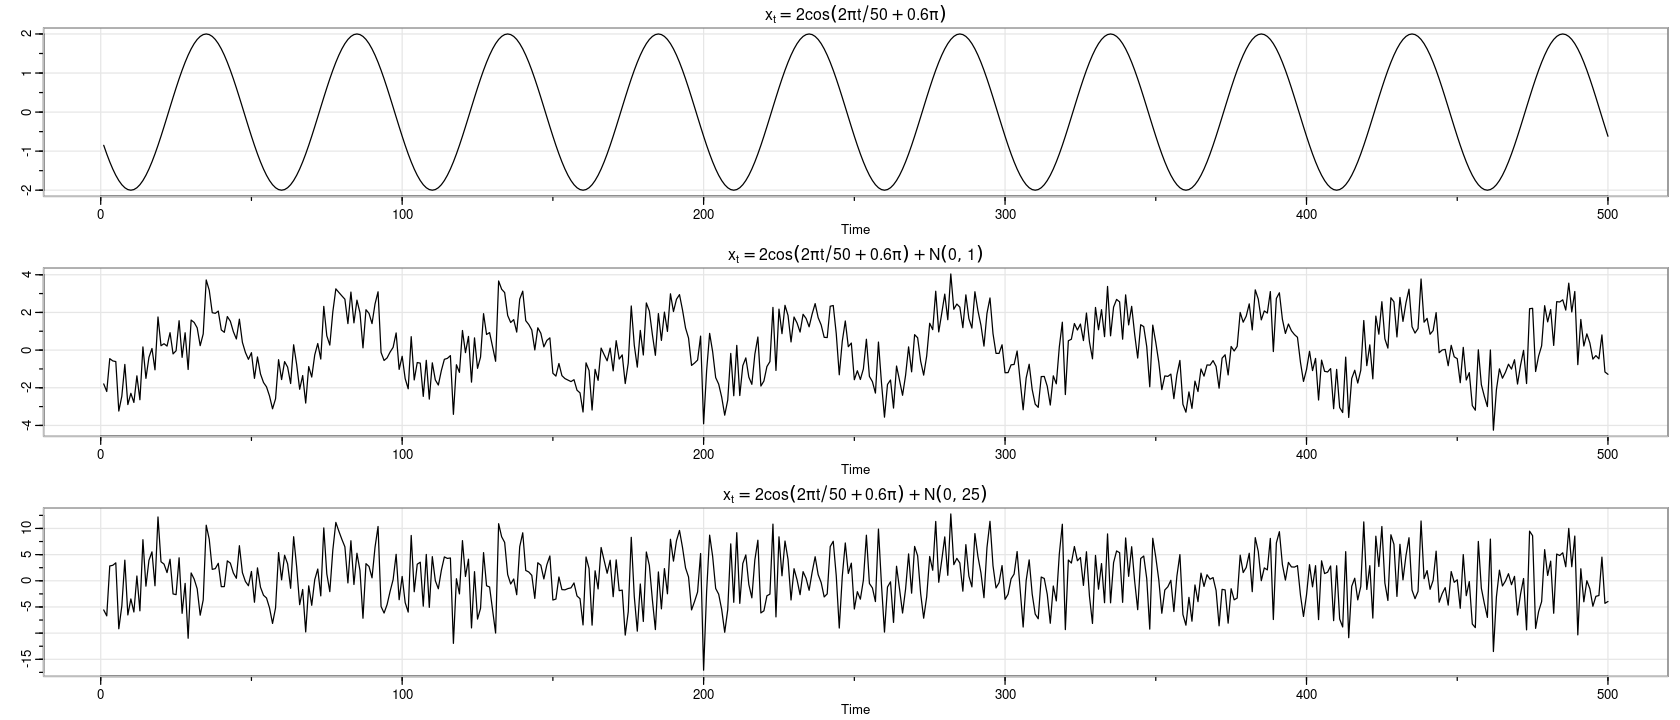

In [19]:
cs = 2*cos(2*pi*((1:500)+15)/50)
w = rnorm(500,0,1)
par(mfrow=c(3,1), mar=c(3,2,2,1), cex.main=1.5)   # help(par) for info
tsplot(cs, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)))
tsplot(cs + w, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)+N(0,1)))
tsplot(cs + 5*w, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)+N(0,25)))

### Observaciones

En este caso, la varianza del ruido determina cuánto podemos recuperar de la señal original.

## Ejercicio 1 [1.2 del libro]

Considere un modelo de señal más ruido de la forma general $x_t = s_t + w_t$ con $w_t$
ruido blanco Gaussiano de varianza $\sigma_w^2=1$. Simular y graficar $n=200$ observaciones de cada uno de los siguientes modelos:

  * $x_t = s_t + w_t$ para $t = 1, \ldots, 200$ y:
  
    $$s_t = \left\{ \begin{array}{ll}
                0 & t=1,\ldots,100, \\
                10e^{-\frac{t-100}{20}}\cos(2\pi t/4) & t=101,\ldots,200.
            \end{array} \right.$$

Sugerencia: se puede generar la señal con:

`s = c(rep(0,100), 10*exp(-(1:100)/20)*cos(2*pi*1:100/4))`

 * $x_t = s_t + w_t$ para $t = 1, \ldots, 200$ y:
    
   $$s_t = \left\{ \begin{array}{ll}
                0 & t=1,\ldots,100, \\
                10e^{-\frac{t-100}{200}}\cos(2\pi t/4) & t=101,\ldots,200.
            \end{array} \right.$$
            
Comparar la apariencia general de las series de ambos modelos con las de terremoto y explosión analizadas antes. Graficar además los moduladores de la señal $e^{-t/20}$ y $e^{-t/200}$ en cada caso.

## Ejercicio 2 [1.3 del libro]

1. Generar $n = 100$ observaciones del proceso autorregresivo:

$$x_t = −.9x_{t−2} + w_t.$$

con $\sigma^2_w =1$, usando el método visto en este cuaderno. A continuación, aplique el siguiente filtro de media móvil a la serie $x$:
$$v_t = \frac{1}{4}(x_t + x_{t−1} + x_{t−2} + x_{t−3}).$$

Grafique conjuntamente $x_t$ y $v_t$. Comente el comportamiento de $x$ y $v$ y qué ocurre al aplicar el filtro.

Sugerencia: el filtro es similar al visto arriba, pero con la opción `sides=1` para utilizar solo los valores anteriores.

2. Repetir la parte anterior pero con la señal $x_t=\cos(2\pi t/4)$

3. Repetir la parte 2. pero agregando ruido blanco gaussiano de varianza $1$.

4. Compare los resultados obtenidos por filtrar en cada caso.